### Chargement des librarires nécessaires à l'exploitation des données :

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np

### Chargement des bases de données liées aux utilisateurs avec la méthode "read_csv" de pandas pour les années 2017 à 2021 :


In [3]:
df_user_2021 = pd.read_csv("data/usagers-2021.csv", sep=';')
df_user_2020 = pd.read_csv("data/usagers-2020.csv", sep=';')
df_user_2019 = pd.read_csv("data/usagers-2019.csv", sep=';')
df_user_2018 = pd.read_csv("data/usagers-2018.csv", sep=',')
df_user_2017 = pd.read_csv("data/usagers-2017.csv", sep=',')

### Ajouter une colonne "année_accident" pour chaque dataframe :

In [4]:
df_user_2021 = df_user_2021.assign(annee_accident=2021)
df_user_2020 = df_user_2020.assign(annee_accident=2020)
df_user_2019 = df_user_2019.assign(annee_accident=2019)
df_user_2018 = df_user_2018.assign(annee_accident=2018)
df_user_2017 = df_user_2017.assign(annee_accident=2017)

### Combien d'accidents enregistrés par année ?

In [5]:
nb_accidents_2017 = int(str(df_user_2017.iloc[-1,0])[7:12])
nb_accidents_2018 = int(str(df_user_2018.iloc[-1,0])[7:12])
nb_accidents_2019 = int(str(df_user_2019.iloc[-1,0])[7:12])
nb_accidents_2020 = int(str(df_user_2020.iloc[-1,0])[7:12])
nb_accidents_2021 = int(str(df_user_2021.iloc[-1,0])[7:12])
accident_par_année = {"nb_accidents":[nb_accidents_2017, nb_accidents_2018,nb_accidents_2019, nb_accidents_2020, nb_accidents_2021]}
pd.DataFrame(data=accident_par_année, index=[2017,2018,2019,2020,2021])

,nb_accidents
2017,60701
2018,57783
2019,58840
2020,47744
2021,56518


In [6]:
# Utilisation de la méthode "concat" pour assembler les cinq dataframes
df = [df_user_2017, df_user_2018, df_user_2019, df_user_2020, df_user_2021]
user_2017_2021 = pd.concat(df)

In [7]:
user_2017_2021.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633615 entries, 0 to 129152
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Num_Acc         633615 non-null  int64  
 1   place           610853 non-null  float64
 2   catu            633615 non-null  int64  
 3   grav            633615 non-null  int64  
 4   sexe            633615 non-null  int64  
 5   trajet          633490 non-null  float64
 6   secu            253111 non-null  float64
 7   locp            578918 non-null  float64
 8   actp            578926 non-null  object 
 9   etatp           578903 non-null  float64
 10  an_nais         630481 non-null  float64
 11  num_veh         633615 non-null  object 
 12  annee_accident  633615 non-null  int64  
 13  id_vehicule     367425 non-null  object 
 14  secu1           367425 non-null  float64
 15  secu2           367425 non-null  float64
 16  secu3           367425 non-null  float64
dtypes: float64

In [8]:
user_2017_2021["actp"] = pd.to_numeric(user_2017_2021["actp"], downcast="float")

ValueError: Unable to parse string "B" at position 266418

In [23]:
user_2017_2021.iloc[266418,:]

Num_Acc           201900000110
place                     10.0
catu                         3
grav                         3
sexe                         1
trajet                     4.0
secu                       NaN
locp                       5.0
actp                         B
etatp                      1.0
an_nais                 2002.0
num_veh                    A01
annee_accident            2019
id_vehicule        138 306 331
secu1                      8.0
secu2                      0.0
secu3                     -1.0
Name: 228, dtype: object

In [9]:
#remplacement des -1 (non renseigné) par des NaN(Not a Number)
user_2017_2021 = user_2017_2021.replace(-1, np.nan)

In [12]:
user_2017_2021.to_csv('user_2017_2021.csv', index=False)

### Gravité des blessures par année (en nb d'usagers) :


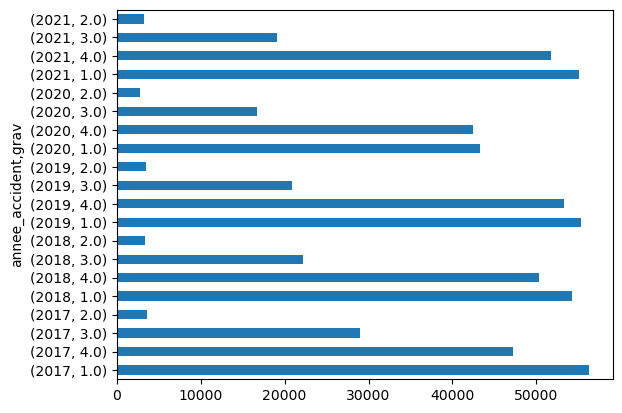

In [11]:
user_2017_2021.groupby("annee_accident")["grav"].value_counts().plot(kind='barh');

In [ ]:
user_2017_2021.to_csv('out.csv', index=False)

In [ ]:
user_2017_2021.loc[user_2017_2021['secu1'] == '']


In [ ]:
#Convertir une variable codée de 1 à 4 en catégorie pour analyse :

# Créer un exemple de DataFrame avec une variable codée de 1 à 4
df = pd.DataFrame({'variable': [1, 2, 3, 4, 1, 2, 3, 4]})

# Convertir la variable en type 'category' et spécifier l'ordre des catégories
df['variable'] = df['variable'].astype('category')
df['variable'].cat.set_categories([1, 2, 3, 4], ordered=True, inplace=True)

# Vérifier le résultat
print(df['variable'])

In [ ]:
# Créer une nouvelle variable binaire mort oui/non à partir de la variable 'grav'
usagers['mort'] = (usagers['grav'] == 2).astype(int)

# Vérifier le résultat
print(usagers[['grav', 'mort']].head())

exemples de variables qui pourraient être utiles pour prédire la mort après un accident en utilisant les données des tables lieux et usagers :

Caractéristiques de l’accident: Des variables telles que l’heure, le jour, le mois et l’année de l’accident, les conditions d’éclairage (lum), les conditions météorologiques (atm), le type de collision (col), etc. pourraient être utiles pour prédire la gravité d’un accident.

Caractéristiques des usagers: Des variables telles que l’âge (an_nais), le sexe (sexe), la catégorie d’usager (catu), le type de véhicule (num_veh), etc. pourraient également être utiles pour prédire la gravité des blessures subies par les usagers impliqués dans un accident.

Caractéristiques du lieu: Des variables telles que le département (dep), la commune (com), le type d’agglomération (agg), le type d’intersection (int), etc. pourraient également être utiles pour prédire la gravité d’un accident en fonction du lieu où il s’est produit.

Il est important de noter que ces variables ne sont que des exemples et qu’il existe de nombreuses autres variables qui pourraient être utiles pour prédire la mort après un accident. Vous pouvez utiliser des techniques telles que l’analyse exploratoire des données et la sélection des caractéristiques pour identifier les variables les plus importantes pour votre modèle.

la variable grav de la table usagers pourrait être très utile pour prédire la mort après un accident. Cette variable indique la gravité des blessures subies par chaque usager impliqué dans un accident. Les valeurs possibles pour cette variable sont les suivantes:

1: Indemne
2: Tué
3: Blessé hospitalisé
4: Blessé léger
Si vous voulez prédire si un accident aura un mort ou non, vous pouvez utiliser cette variable pour créer votre variable dépendante. Par exemple, vous pouvez créer une nouvelle variable binaire qui prend la valeur 1 si grav est égal à 2 (c’est-à-dire si l’usager a été tué) et 0 sinon (c’est-à-dire si l’usager a été indemne, blessé hospitalisé ou blessé léger).

Il est important de noter que la variable grav ne doit pas être utilisée comme une variable indépendante dans votre modèle, car elle contient des informations sur la variable dépendante que vous voulez prédire. Si vous incluez cette variable comme une variable indépendante dans votre modèle, cela pourrait entraîner un surajustement et réduire la capacité de votre modèle à généraliser à de nouvelles données.